## Identifying the variation in proteomic replicate profiles 

**Input:**  Processed protein-protein correlation of the studies given below.      
<ol>
    <li><a href=https://www.cell.com/cell/fulltext/S0092-8674(16)30673-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867416306730%3Fshowall%3Dtrue>Ovarian Cancer (2016)</a></li>
    <li><a href=https://www.cell.com/cell/fulltext/S0092-8674(19)30292-2>Colon Cancer (2019)</a></li>
    <li><a href=https://www.cell.com/cell/fulltext/S0092-8674(19)31385-6?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867419313856%3Fshowall%3Dtrue>CCLE (2020)</a></li>
</ol>

#### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
from decimal import Decimal
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
plt.style.use(['seaborn-white'])

%matplotlib inline
import graphing_utils
import customized_plots
import common_utils as cu

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/'+'/'+'/'.join(folders) +'/'+ fname)

file_proteomic_replicate_correlations = get_local_data_path(['processed', 'correlation_replicates'], 
                                                            'proteomic_reproducibility.csv')
file_selected_proteomic_replicates = get_local_data_path(['processed', 'correlation_replicates'], 
                                                         'selected_proteomic_reproducibility.xlsx')

#### Load data

In [3]:
proteomic_replicate_correlations = pd.read_csv(file_proteomic_replicate_correlations, index_col=0)
proteomic_replicate_correlations[:2]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
A1BG,0.739736,0.256359,NaN
A2M,0.811584,0.227659,0.541796


In [4]:
ov_replicates_corr = proteomic_replicate_correlations['Ovarian (JHU-PNNL)'].copy(deep=True).dropna()
colon_replicates_corr = proteomic_replicate_correlations['Colon (TMT-LF)'].copy(deep=True).dropna()
ccle_replicates_corr = proteomic_replicate_correlations['CCLE (R1-R3)'].copy(deep=True).dropna()

### 1.  Distribution of proteomic replicates' correlation

In [5]:
args = [graphing_utils.additional_plot_parameters(xlab="Colon Protein (TMT) - Protein (LF)\nCorrelation", ylab="Density"),
        graphing_utils.additional_plot_parameters(xlab="OV Protein (JHU) Protein(PNNL)\nCorrelation", ylab=None),
        graphing_utils.additional_plot_parameters(xlab="CCLE Protein (R1) -Protein (R3)\nCorrelation", ylab=None)]

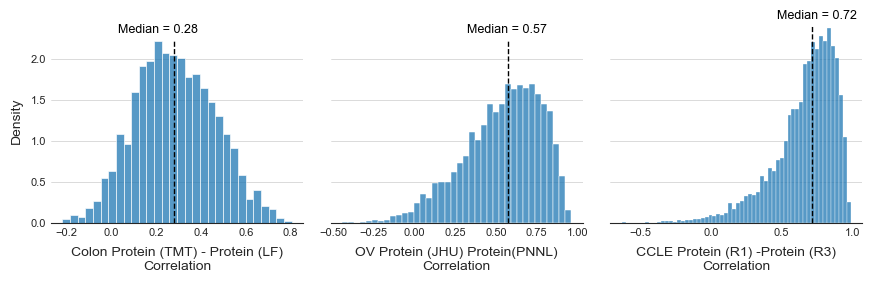

In [6]:
figure, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
customized_plots.draw_histogram(axes[0], colon_replicates_corr, args[0])  
customized_plots.draw_histogram(axes[1], ov_replicates_corr, args[1])
customized_plots.draw_histogram(axes[2], ccle_replicates_corr, args[2], ymax = 0.97)  
figure.tight_layout(pad=1.5)
# figure.savefig('../figures/Figure1B.svg', bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
    The proteomic replicates correlation ranges from -0.5 to 1 across all studies. This implies there is significant variation in proteomic reproducibility.
</div>

### 2. Proteomic replicates' correlation across different studies

In [7]:
def draw_hexbin_for_pair(ax, x, y, xlab, ylab):
    x_subset, y_subset = cu.get_matched_index(x, y)    
    image = ax.hexbin(x_subset, y_subset, gridsize=30, mincnt=1, cmap="viridis")    
    ax.set_xlim(np.array([-0.5,1]))
    ax.set_ylim(np.array([-0.6,1]))
    ax.yaxis.grid(True, linewidth=0.5); 
    ax.xaxis.grid(True, linewidth=0.5);
    ax.set_xlabel(xlab, fontsize=9) ; ax.set_ylabel(ylab, fontsize=10)
    
    # Colorbar as legend
    cb = plt.colorbar(image, spacing='uniform', ax=ax)
    cb.outline.set_visible(False)
    cb.ax.tick_params(labelsize=9)
    
    # annotating with Spearman correlation of the values of the two axes
    result = spearmanr(x_subset, y_subset)
    annotation = "N = " + str(len(x_subset)) + "; " + "\n" + r"$\rho$" + " = " + str(round(result[0], 2)) + \
                 ", p = " + str("{:.1e}".format(Decimal(result[1]))) 
    annot = ax.annotate(annotation, xy=(-0.435, -0.45), bbox=dict(boxstyle='round', edgecolor='w', fc='w'), size=8)

In [8]:
proteomic_replicate_subset = proteomic_replicate_correlations.dropna()
proteomic_replicate_subset[(proteomic_replicate_subset['Ovarian (JHU-PNNL)'] > 0.7) & 
                           (proteomic_replicate_subset['Colon (TMT-LF)'] > 0.7) &
                           (proteomic_replicate_subset['CCLE (R1-R3)'] > 0.7)]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
ASS1,0.889663,0.751921,0.876161
GBP1,0.876833,0.727972,0.896801
ITGB4,0.843109,0.754737,0.946336
MCM3,0.807883,0.719578,0.708978
PRDX5,0.813783,0.712072,0.849329
WARS,0.859866,0.719839,0.857585


In [9]:
proteomic_replicate_subset[(proteomic_replicate_subset['Ovarian (JHU-PNNL)'] < 0.2) & 
                           (proteomic_replicate_subset['Colon (TMT-LF)'] < 0.2) &
                           (proteomic_replicate_subset['CCLE (R1-R3)'] < 0.2)]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
RPL24,0.095317,0.076987,0.143447
RPL35,-0.178886,-0.042658,0.093911
RPL36AL,0.119146,0.089873,-0.073271
RPS15A,0.160389,-0.017154,0.077399
RPS29,0.072214,-0.073834,0.180599
RPS9,0.187168,0.101687,-0.114551


<div class="alert alert-block alert-warning">
    Amongst the proteins which are high and low reproducible, we choose GBP1 (GTP-Binding Protein 1) and RPS29 (Ribosomal Protein S29) for further analysis. 
</div>

In [10]:
ov_replicates_combined = pd.read_excel(file_selected_proteomic_replicates, sheet_name='Ovarian replicates', 
                                       index_col = [0,1]).transpose()
ov_replicates_combined[:2]

PNNL            JHU          
hgnc_symbol   GBP1  RPS29    GBP1     RPS29
TCGA-09-1664 -1.23  0.633 -0.8599  0.206485
TCGA-13-1488  0.62  0.239  0.5291  0.182285

In [11]:
ccle_replicates_combined = pd.read_excel(file_selected_proteomic_replicates, sheet_name='CCLE replicates', 
                                       index_col = [0,1]).transpose()
ccle_replicates_combined[:2]

R1                  R3          
Gene_Symbol                 GBP1     RPS29      GBP1     RPS29
HEP3B217_LIVER_TenPx02 -1.013950 -0.175282 -2.017821 -0.223075
HEPG2_LIVER_TenPx02    -0.769355 -0.246087 -1.088799  0.228791

In [12]:
colon_replicates_combined = pd.read_excel(file_selected_proteomic_replicates, sheet_name='Colon replicates', 
                                       index_col = [0,1]).transpose()
colon_replicates_combined[:2]

TMT             LF        
attrib_name    GBP1  RPS29    GBP1   RPS29
01CO005      1.1649  0.720  2.6645  1.3161
01CO006      0.1686  1.167  2.6668  1.0704

In [13]:
import seaborn as sns

def draw_scatterplot(ax, x, y, xlab, ylab, title=None, xy=None, color='#404788FF'):
    sns.scatterplot(x=x, y=y, ax=ax, color=color)
    ax.set_xlabel(xlab, fontsize=9) ; ax.set_ylabel(ylab, fontsize=10)
    ax.set_title(title, weight='bold', y=1.05, size=11)
    result = spearmanr(x, y, nan_policy='omit')
    exponent_notation = str("{:.2e}".format(Decimal(result[1]))) if result[1] < 0.01 else str(round(Decimal(result[1]),2)) 
    annotation = r"$\rho$" + " = " + str(round(result[0], 2)) + \
                 ", p = " + exponent_notation 
    
    xy = (ax.get_xticks()[int((len(ax.get_xticks()) -1)/2)], ax.get_yticks()[1]+0.025) if(xy == None) else xy
    
    annot = ax.annotate(annotation, xy=xy, bbox=dict(boxstyle='round', edgecolor='w', fc='w', alpha=0.75), size=8)

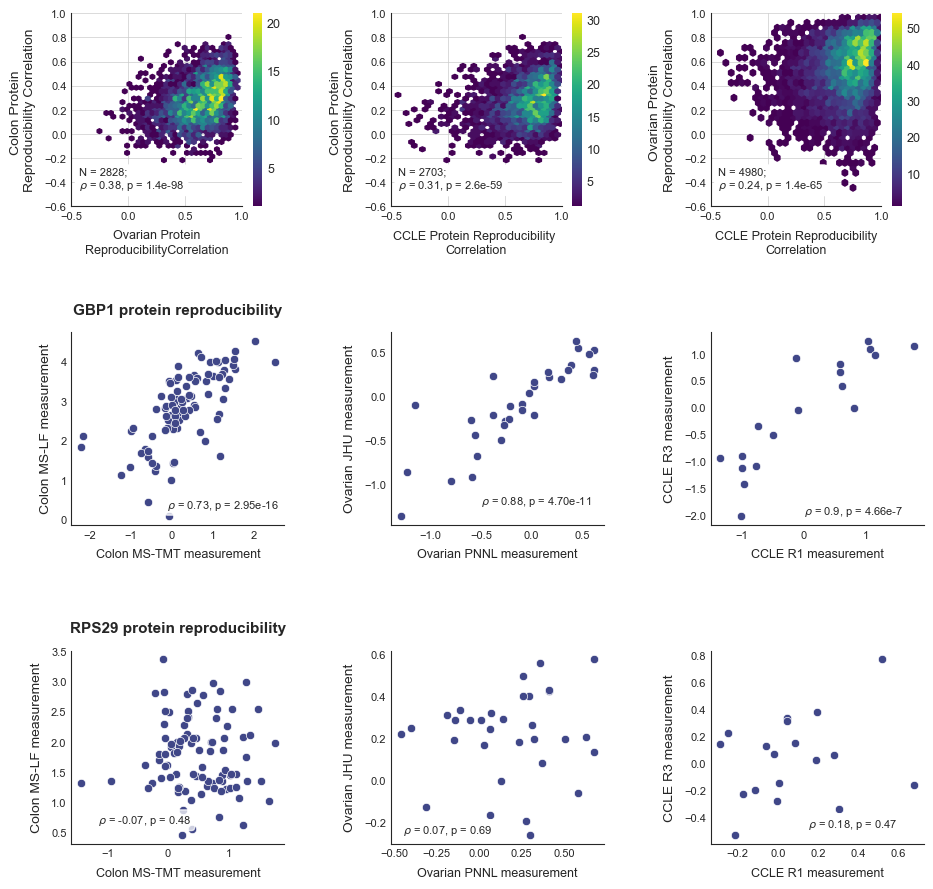

In [14]:
xlab1 = 'Colon MS-TMT measurement'; ylab1= 'Colon MS-LF measurement'
xlab2 = 'Ovarian PNNL measurement'; ylab2= 'Ovarian JHU measurement'
xlab3 = 'CCLE R1 measurement'; ylab3= 'CCLE R3 measurement'


with plt.rc_context({'axes.spines.bottom': True, 'axes.spines.left': True,
                     'axes.linewidth': 0.8, 'xtick.bottom': True,}):
    figure, axes = plt.subplots(3, 3, figsize=(11, 11))
    draw_hexbin_for_pair(axes[0,0], ov_replicates_corr, colon_replicates_corr, 
                         xlab='Ovarian Protein\nReproducibilityCorrelation', 
                         ylab='Colon Protein \nReproducibility Correlation')  
    draw_hexbin_for_pair(axes[0,1], ccle_replicates_corr, colon_replicates_corr, 
                         xlab='CCLE Protein Reproducibility \nCorrelation', 
                         ylab='Colon Protein \nReproducibility Correlation')
    draw_hexbin_for_pair(axes[0,2], ccle_replicates_corr, ov_replicates_corr,
                         xlab='CCLE Protein Reproducibility\nCorrelation',
                         ylab='Ovarian Protein \nReproducibility Correlation')     
    draw_scatterplot(axes[1,0], colon_replicates_combined['TMT', 'GBP1'], colon_replicates_combined['LF', 'GBP1'],
                     xlab=xlab1, ylab=ylab1, title='GBP1 protein reproducibility', xy = (-0.1, 0.3))
    draw_scatterplot(axes[1,1], ov_replicates_combined['PNNL', 'GBP1'], ov_replicates_combined['JHU', 'GBP1'],  
                     xlab=xlab2, ylab=ylab2)
    draw_scatterplot(axes[1,2], ccle_replicates_combined['R1', 'GBP1'], ccle_replicates_combined['R3', 'GBP1'],
                     xlab=xlab3, ylab=ylab3)      
    draw_scatterplot(axes[2,0], colon_replicates_combined['TMT', 'RPS29'], colon_replicates_combined['LF', 'RPS29'], 
                     xlab=xlab1, ylab=ylab1, title='RPS29 protein reproducibility', 
                     xy = (-1.15, 0.65))  
    draw_scatterplot(axes[2,1], ov_replicates_combined['PNNL', 'RPS29'], ov_replicates_combined['JHU', 'RPS29'], 
                     xlab=xlab2, ylab=ylab2, xy = (-0.45, -0.25))
    draw_scatterplot(axes[2,2], ccle_replicates_combined['R1', 'RPS29'], ccle_replicates_combined['R3', 'RPS29'],
                     xlab=xlab3, ylab=ylab3, xy = (0.15, -0.47))  
    plt.subplots_adjust(wspace=0.5, hspace=0.65)
#     figure.savefig('../figures/Figure3.svg', bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
    Proteins reproducible in one study seem to be reproducible in other studies as well.
</div>
